In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')

In [2]:
Tc = np.array([
    2458962.86400, 2458976.87712, 2458997.89086, 2459003.49610, 2459011.91238,
    2459301.99500, 2459346.83850, 2459353.82930, 2459367.85766, 2459381.85900,
    2459395.88800, 2459409.90200, 2459422.51500, 2459440.73108, 2459443.51780,
    2459447.73700, 2459461.75100
])
Tc_error = np.array([
    0.0007, 0.0007, 0.0008, 0.0041, 0.0006, 0.0009, 0.0011, 0.0024, 0.0007,
    0.0092, 0.0020, 0.0019, 0.0015, 0.0006, 0.0046, 0.0012, 0.0100
])

P = 1.4013707604029817 days
T0 = 2458962.863007541


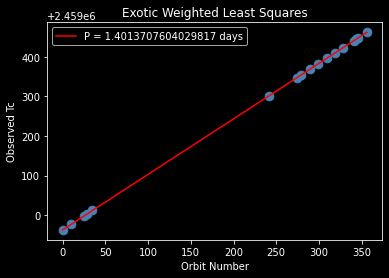

In [3]:
Tc_0 = Tc - Tc[0]
#print(Tc_obs_0)
P = 1.4013788  #orbital period for WASP-135
orbit = np.rint(Tc_0 /P)  #number of orbits since first observation (rounded to nearest integer)
#print(orbit)
m_weighted, b_weighted = np.polyfit(orbit, Tc, 1, w= 1/Tc_error**2)

X = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, m_weighted * X + b_weighted, c='r', 
         label = "P = 1.4013707604029817 days")
plt.scatter(orbit, Tc, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Exotic Weighted Least Squares")
plt.legend()
print("P =", m_weighted, "days")
print("T0 =", b_weighted)
#plt.savefig("Exotic Weighted Least Squares")

P = 1.4013668146647005 days
T0 = 2458962.8608882776


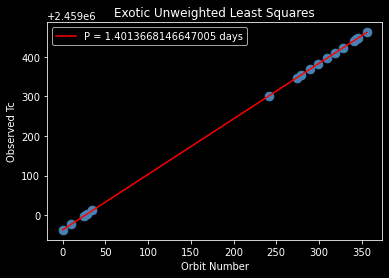

In [4]:
m_unweighted, b_unweighted = np.polyfit(orbit, Tc, 1)
X_exotic = np.linspace(min(orbit), max(orbit), 1000)
plt.plot(X, m_unweighted * X + b_unweighted, c='r', 
         label = "P = 1.4013668146647005 days")
plt.scatter(orbit, Tc, c="steelblue", s=75)
plt.xlabel("Orbit Number")
plt.ylabel("Observed Tc")
plt.title("Exotic Unweighted Least Squares")
plt.legend()
print("P =", m_unweighted, "days")
print("T0 =", b_unweighted)
#plt.savefig("Exotic Unweighted Least Squares")